In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
RR = np.array([[0.5, 0.5, 0., 0.0], [0., 0., 0.5, 0.5]])
II = np.array([
    [0.5 , 0.0],
    [0.75, 0.25],
    [0.25, 0.75],
    [0.0 , 0.5 ]
])

In [109]:
A = np.array([
    [-2.0, 1.0, 0.0, 0.0],
    [1.0 ,-2.0, 1.0, 0.0],
    [0.0 , 1.0,-2.0, 1.0],
    [0.0 , 0.0, 1.0,-2.0]    
])

In [110]:
np.dot(RR, np.dot(A, II))

array([[-0.5 ,  0.25],
       [ 0.25, -0.5 ]])

In [111]:
D = np.array([
    [0.0 ,-0.5, 0.0, 0.0],
    [0.5 , 0.0,-0.5, 0.0],
    [0.0 , 0.5, 0.0,-0.5],
    [0.0 , 0.0, 0.5, 0.0]    
])

In [112]:
np.dot(RR, np.dot(D, II))

array([[-0.125, -0.25 ],
       [ 0.25 ,  0.125]])

In [113]:
x = np.arange(4) + 0.5

In [114]:
x

array([0.5, 1.5, 2.5, 3.5])

In [115]:
np.dot(RR, x)

array([1., 3.])

In [116]:
def set_RR(N):
    assert(N % 2 == 0)
    
    RR = np.zeros((N//2, N))
    for i in range(N//2):
        RR[i,2*i+0] = 0.5
        RR[i,2*i+1] = 0.5
    return RR

def set_II(N):
    """
    Matrix for interpolation. Zero BC only
    """
    assert(N % 2 == 0)
    
    II = np.zeros((N, N//2))
    II[0,0] = 0.5
    for i in range(N//2-1):
        print(i)
        II[1+2*i, i+0] = 0.75
        II[1+2*i, i+1] = 0.25
        II[2+2*i, i+0] = 0.25
        II[2+2*i, i+1] = 0.75
    II[-1,-1] = 0.5
    return II

In [117]:
set_RR(8)

array([[0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5]])

In [118]:
set_II(8)

0
1
2


array([[0.5 , 0.  , 0.  , 0.  ],
       [0.75, 0.25, 0.  , 0.  ],
       [0.25, 0.75, 0.  , 0.  ],
       [0.  , 0.75, 0.25, 0.  ],
       [0.  , 0.25, 0.75, 0.  ],
       [0.  , 0.  , 0.75, 0.25],
       [0.  , 0.  , 0.25, 0.75],
       [0.  , 0.  , 0.  , 0.5 ]])

In [428]:
func = lambda x: np.sin(x) # this is RHS

class SingleLevel:
    def __init__(self, N, xmin=0.0, xmax=1.0):
        assert(N % 2 == 0)
        self.N = N
        self.xmin = xmin
        self.xmax = xmax
        self.h = (self.xmax-self.xmin)/self.N
        self.h2 = self.h**2
        self.x = np.linspace(0.0, 1.0, self.N, endpoint=False) + 0.5/self.N
        
        self.AA = self.set_AA(self.N)
        self.RR = self.set_RR(self.N)
        self.II = self.set_II(self.N)
        
    def set_AA(self, N):
        AA = np.zeros((N, N))
        stencil = [1,-2,1]
        AA[0,:2] = stencil[1:]
        for i in range(1,N-1):
            AA[i,i-1:i+2] = stencil[:]
        AA[-1,-2:] = stencil[:-1]
        return AA
    
    def smoothing(self, u):
        """
        smoothing: this is a single step Jacobi iteration
        """
        assert(u.shape[0] % 2 == 0)
        v = u.copy()
        rhs = func(self.x)
        v[0]    = 1.0/3.0* (v[1] - self.h2 * rhs[0] )
        v[1:-1] = 0.5*(v[2:] + v[:-2] - self.h2 * rhs[1:-1] )
        v[-1]   = 1.0/3.0*(v[-2] - self.h2 * rhs[-1] )
        return v
    
    def set_RR(self, N):
        assert(N % 2 == 0)

        RR = np.zeros((N//2, N))
        for i in range(N//2):
            RR[i,2*i+0] = 0.5
            RR[i,2*i+1] = 0.5
        return RR

    def set_II(self, N):
        """
        Matrix for interpolation. Zero BC only
        """
        assert(N % 2 == 0)

        II = np.zeros((N, N//2))
        II[0,0] = 0.5
        for i in range(N//2-1):
            print(i)
            II[1+2*i, i+0] = 0.75
            II[1+2*i, i+1] = 0.25
            II[2+2*i, i+0] = 0.25
            II[2+2*i, i+1] = 0.75
        II[-1,-1] = 0.5
        return II
    
def compute_l2(err):
    return np.sum(err**2)

In [429]:
level = SingleLevel(N=4)
print(level.x)

0
[0.125 0.375 0.625 0.875]


In [430]:
level.AA

array([[-2.,  1.,  0.,  0.],
       [ 1., -2.,  1.,  0.],
       [ 0.,  1., -2.,  1.],
       [ 0.,  0.,  1., -2.]])

In [329]:
level.x

array([0.125, 0.375, 0.625, 0.875])

In [330]:
x = np.arange(10)

In [331]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [332]:
x[1:-1] = 0.5 * (x[2:] + x[:-2])

In [333]:
x.shape

(10,)

In [334]:
level = SingleLevel(N=8)

In [335]:
u0 = -np.sin(level.x)
sol_f = lambda x: -np.sin(x) + np.sin(1.0) * x
u_sol = sol_f(level.x)

omega_jacobi = 2.0/3.0

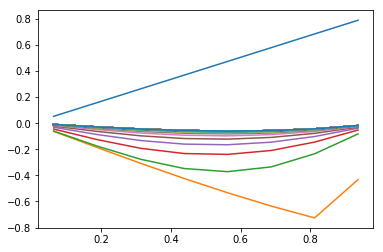

In [336]:
l2list = []

fig, ax = plt.subplots()
err = u_sol - u0
l2list.append(compute_l2(err))

ax.plot(level.x, err)
u = u0.copy()
for itr in range(1000):
    u_new = level.smoothing(u)
    # jacobi step
    u_new = (1.0 - omega_jacobi) * u + omega_jacobi * u_new
    
    u = u_new
    if itr % 10 == 0:
        err = u_sol - u
        l2list.append(compute_l2(err))
        ax.plot(level.x, u)

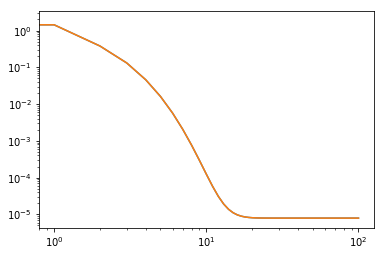

In [337]:
niter = len(l2list)
fig, ax = plt.subplots()
ax.plot(range(niter), l2list_full)
ax.plot(range(niter), l2list)
ax.set_yscale("log")
ax.set_xscale("log")

In [322]:
l2list_full = l2list.copy()

In [281]:
level.N

8

In [412]:
u_h = u0.copy()
print("initial u_h", u_h)
RR = set_RR(N=8)
II = set_II(N=8)

initial u_h [-0.06245932 -0.1864033  -0.30743851 -0.42367626 -0.53330267 -0.63460708
 -0.72600866 -0.80608111]
0
1
2


In [413]:
f_h = func(level.x)
# residual at current level
r_h = rhs - np.dot(level.AA, u_h)
print(r_h)
# smooth?
r_2h = np.dot(RR, r_h)
print(r_2h)

[ 0.12394398  0.18349454  0.30264104  0.41706493  0.52498066  0.62470425
  0.71467953 -0.08007245]
[0.15371926 0.35985299 0.57484246 0.31730354]


In [ ]:
A_2h = np.dot(RR, np.dot(level.AA, II))
# solve A_2h
e_2h = np.linalg.solve(A_2h, r_2h)
print(e_2h)

In [384]:
e_h = np.dot(II, e_2h)
print(e_h)

[-1.26456977 -3.00770518 -3.96483644 -4.56211472 -4.79954001 -4.46212284
 -3.54986322 -1.5468667 ]


In [385]:
u_new = u_h + e_h

In [386]:
u_new

array([-1.32702909, -3.19410848, -4.27227495, -4.98579097, -5.33284268,
       -5.09672992, -4.27587187, -2.35294781])

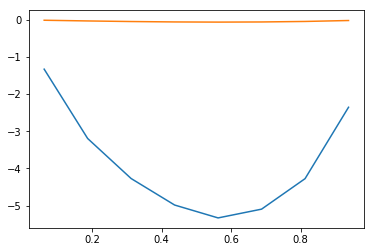

In [387]:
fig, ax = plt.subplots()
#ax.plot(level.x, u_h)
ax.plot(level.x, u_new)
ax.plot(level.x, u_sol)

In [415]:
level_1 = SingleLevel(N=4)
RR = set_RR(N=4)
II = set_II(N=4)
A_4h = np.dot(RR, np.dot(level_1.AA, II))

0


In [418]:
r_4h = np.dot(RR, r_2h)
print(r_4h)

[0.25678612 0.446073  ]


In [419]:
e_4h = np.linalg.solve(A_4h, r_4h)
print(e_4h)

[-1.27952699 -1.53190949]


In [420]:
e_2h = np.dot(II, e_4h)
print(e_2h)

[-0.63976349 -1.34262261 -1.46881386 -0.76595474]


In [421]:
II = set_II(N=8)
e_h = np.dot(II, e_2h)

0
1
2


In [422]:
e_h

array([-0.31988175, -0.81547827, -1.16690783, -1.37417043, -1.43726605,
       -1.29309908, -0.94166952, -0.38297737])

In [423]:
u_new2 = u_h + e_h

In [424]:
u_new2

array([-0.38234106, -1.00188157, -1.47434635, -1.79784668, -1.97056873,
       -1.92770616, -1.66767818, -1.18905848])

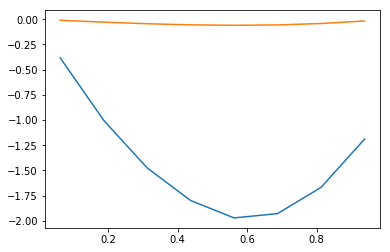

In [425]:
fig, ax = plt.subplots()
#ax.plot(level.x, u_h)
ax.plot(level.x, u_new2)
#.plot(level.x, u_new)
ax.plot(level.x, u_sol)

In [410]:
u_h = u_new2

In [431]:
levels = []
for n in [8,4,2]:
    levels.append(SingleLevel(n))

0
1
2
0


In [437]:
def singleVcycle(u0, levels):
    """
    single V cycle:
    u0 : finest grid
    """
    
    u_f = u0.copy()
    u = u0.copy()
    for i, lvl in enumerate(levels):
        print("level (finest=0): ", lvl.N)
        if (i == len(levels)-1):
            print("this is coarest level.")
            err = np.linalg.solve(lvl.AA, res_c)
        else:
            usmooth = lvl.smoothing(u)
            usmooth = lvl.smoothing(usmooth)

            # residual at the current level
            res_f =func(lvl.x) - np.dot(lvl.AA, u)
            
            res_c = np.dot(lvl.RR, res_f)
            
            u = 
            
            
            
            
            
        
        

In [438]:
singleVcycle(u0, levels)

level (finest=0):  8
level (finest=0):  4


ValueError: operands could not be broadcast together with shapes (6,) (2,) 